# <font color = "green"> Árboles de Decisión

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import os
from graphviz import Source
plt.style.use("ggplot")

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

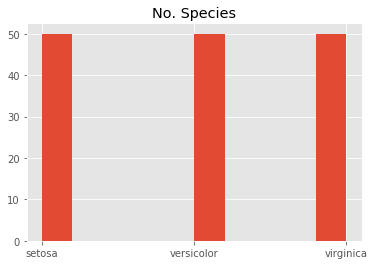

In [4]:
plt.title("No. Species")
plt.hist(data["Species"],cumulative = False, stacked = True)
plt.show()

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [7]:
predictors = colnames[:-1]
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

In [8]:
target = colnames[-1]
target

'Species'

In [9]:
data["is_train"] = np.random.uniform(0,1,len(data))<=.75
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,False
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


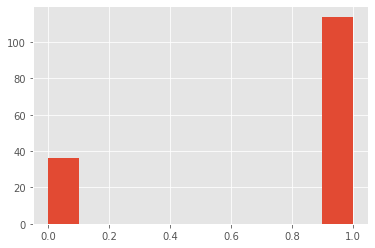

In [10]:
plt.hist(data["is_train"].astype(np.float32))
plt.show()

In [11]:
train, test = data[data["is_train"]==1.], data[data["is_train"]==0.]

In [12]:
train.shape, test.shape

((114, 6), (36, 6))

In [13]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20,min_samples_leaf=1)
 # 20 mínimo de No. de observaciones necesariar para que un nodo se divida en un subnodo

In [14]:
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
preds = tree.predict(test[predictors])

In [17]:
pd.crosstab(test[target],preds, rownames = ["Actual"], colnames = ["Predictors"])

Predictors,setosa,versicolor,virginica
Actual,,,
setosa,14,0,0
versicolor,0,11,0
virginica,0,1,10


In [18]:
tree.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
tree.criterion

'entropy'

## Visualización del árbol de decisión

In [20]:
# Creamos el archivo y escribimos el árbol de decisión
with open("resources/iris_dtree","w") as dotfile:
    export_graphviz(tree,out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [21]:
file = open("resources/iris_dtree","r") 
file

<_io.TextIOWrapper name='resources/iris_dtree' mode='r' encoding='cp1252'>

In [22]:
text = file.read()

In [23]:
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Width <= 0.8\\nentropy = 1.584\\nsamples = 114\\nvalue = [36, 39, 39]"] ;\n1 [label="entropy = 0.0\\nsamples = 36\\nvalue = [36, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 1.0\\nsamples = 78\\nvalue = [0, 39, 39]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.378\\nsamples = 41\\nvalue = [0, 38, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 36\\nvalue = [0, 36, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.85\\nentropy = 0.179\\nsamples = 37\\nvalue = [0, 1, 36]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 0, 34]"] ;\n6 -> 8 ;\n}'

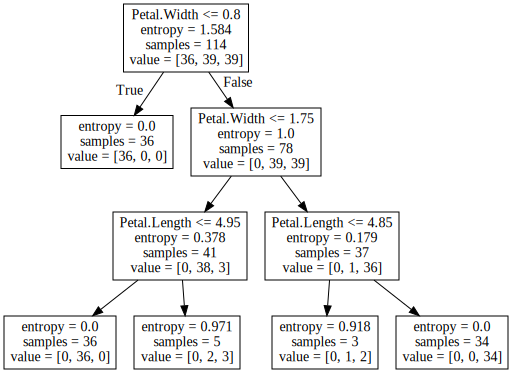

In [24]:

Source(text)

## Cross Validation para la poda

In [25]:
x = data[predictors]
y = data[target]

In [26]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_split=20)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [29]:
cv = KFold(n_splits=15, shuffle=True)

In [30]:
scores = cross_val_score(tree, x,y, scoring="accuracy", cv = cv, n_jobs=-1)

In [31]:
scores

array([0.9, 1. , 0.9, 1. , 1. , 1. , 1. , 0.8, 0.8, 0.9, 1. , 0.9, 1. ,
       1. , 1. ])

In [32]:
n_score = np.mean(scores)

In [33]:
n_score

0.9466666666666668

In [34]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = i, min_samples_split= 20)
    tree.fit(x,y)
    cv = KFold(n_splits=15, shuffle=True)
    scores = cross_val_score(tree, x, y, scoring = "accuracy", cv = cv, n_jobs=-1)
    n_scores = np.mean(scores)
    print("Score for i = {} es de {}. ".format(i, n_score))
    print("Importancias de la característica computalizada {}".format(tree.feature_importances_))

Score for i = 1 es de 0.9466666666666668. 
Importancias de la característica computalizada [0. 0. 0. 1.]
Score for i = 2 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.66620285 0.33379715]
Score for i = 3 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.07060267 0.92939733]
Score for i = 4 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.06844516 0.93155484]
Score for i = 5 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.06844516 0.93155484]
Score for i = 6 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.66869158 0.33130842]
Score for i = 7 es de 0.9466666666666668. 
Importancias de la característica computalizada [0.         0.         0.66869158 0.33130842]
Score for i = 8 es de 0.9466666666666668. 
Importancias de la característ

## Random Forest de Clasificación

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
forest = RandomForestClassifier(n_jobs = 2, oob_score=True, n_estimators=1000)
# oob_score para obtener los scores de la clasificación
forest.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [37]:
forest.oob_decision_function_
#Podrían salir nan's si se toman pocos árboles. Si tomas 10 no tendrá suficientes criterios de clasificación, por 
# lo tanto, sería mejor si tomamos más árboles.

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.96994536, 0.03005464, 0.        ],
       [0.9943662 , 0.0056338 , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.9821883 , 0.0178117 , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [38]:
forest.oob_score_ #Precisión del árbol

0.96

In [39]:
forest.predict

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=2, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)>